In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [9]:
df = pd.read_csv('lending_club_loan_two.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [11]:
sns.countplot(x='loan_status',data=df)

<Axes: xlabel='loan_status', ylabel='count'>

C:\Users\ErnestMudau\AppData\Local\Temp\ipykernel_2648\3976390358.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'],kde=False,bins=40)


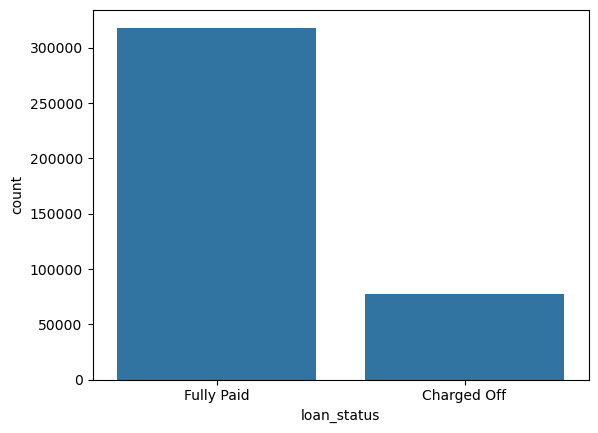

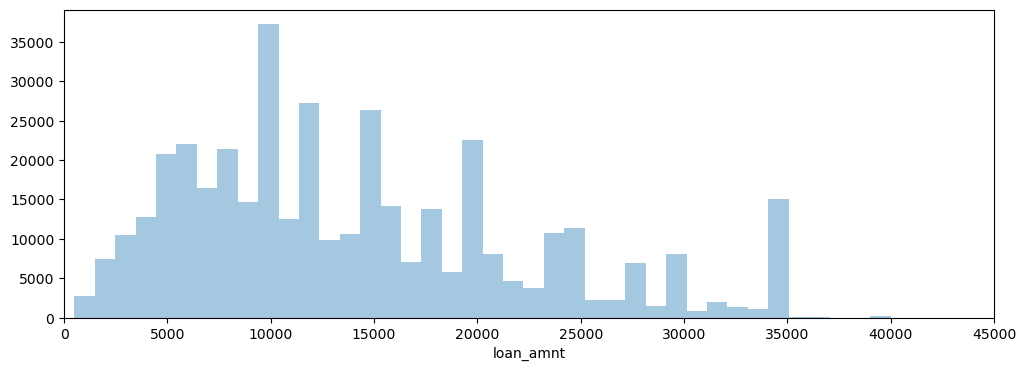

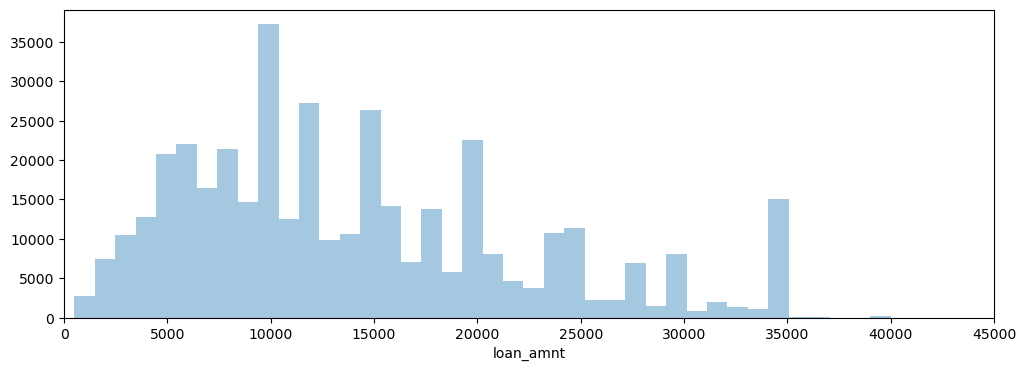

In [13]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)
plt.show()

In [15]:
df

loan_amnt        term  int_rate  installment grade sub_grade  \
0         10000.0   36 months     11.44       329.48     B        B4   
1          8000.0   36 months     11.99       265.68     B        B5   
2         15600.0   36 months     10.49       506.97     B        B3   
3          7200.0   36 months      6.49       220.65     A        A2   
4         24375.0   60 months     17.27       609.33     C        C5   
...           ...         ...       ...          ...   ...       ...   
396025    10000.0   60 months     10.99       217.38     B        B4   
396026    21000.0   36 months     12.29       700.42     C        C1   
396027     5000.0   36 months      9.99       161.32     B        B1   
396028    21000.0   60 months     15.31       503.02     C        C2   
396029     2000.0   36 months     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc  ...  \
0                      Marketing  10+ years           RENT    117000.0  ...   
1                Credit analyst     4 years       MORTGAGE     65000.0  ...   
2                   Statistician   < 1 year           RENT     43057.0  ...   
3                Client Advocate    6 years           RENT     54000.0  ...   
4        Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   
...                          ...        ...            ...         ...  ...   
396025          licensed bankere    2 years           RENT     40000.0  ...   
396026                     Agent    5 years       MORTGAGE    110000.0  ...   
396027              City Carrier  10+ years           RENT     56500.0  ...   
396028      Gracon Services, Inc  10+ years       MORTGAGE     64000.0  ...   
396029  Internal Revenue Service  10+ years           RENT     42996.0  ...   

       open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0          16.0     0.0   36369.0       41.8      25.0                    w   
1          17.0     0.0   20131.0       53.3      27.0                    f   
2          13.0     0.0   11987.0       92.2      26.0                    f   
3           6.0     0.0    5472.0       21.5      13.0                    f   
4          13.0     0.0   24584.0       69.8      43.0                    f   
...         ...     ...       ...        ...       ...                  ...   
396025      6.0     0.0    1990.0       34.3      23.0                    w   
396026      6.0     0.0   43263.0       95.7       8.0                    f   
396027     15.0     0.0   32704.0       66.9      23.0                    f   
396028      9.0     0.0   15704.0       53.8      20.0                    f   
396029      3.0     0.0    4292.0       91.3      19.0                    f   

       application_type  mort_acc  pub_rec_bankruptcies  \
0            INDIVIDUAL       0.0                   0.0   
1            INDIVIDUAL       3.0                   0.0   
2            INDIVIDUAL       0.0                   0.0   
3            INDIVIDUAL       0.0                   0.0   
4            INDIVIDUAL       1.0                   0.0   
...                 ...       ...                   ...   
396025       INDIVIDUAL       0.0                   0.0   
396026       INDIVIDUAL       1.0                   0.0   
396027       INDIVIDUAL       0.0                   0.0   
396028       INDIVIDUAL       5.0                   0.0   
396029       INDIVIDUAL       NaN                   0.0   

                                                  address  
0            0174 Michelle Gateway\nMendozaberg, OK 22690  
1         1076 Carney Fort Apt. 347\nLoganmouth, SD 05113  
2         87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113  
3                   823 Reid Ford\nDelacruzside, MA 00813  
4                    679 Luna Roads\nGreggshire, VA 11650  
...                                                   ...  
396025     12951 Williams Crossing\nJohnnyville, DC 30723  
396026  0114 Fowler Field Suite 028\nRachelborough, LA..

In [16]:
# Remove the word "months" and convert to integer
df['term'] = df['term'].str.replace(' months', '').astype(int)


In [18]:
df.corr(numeric_only=True)


loan_amnt      term  int_rate  installment  annual_inc  \
loan_amnt              1.000000  0.393862  0.168921     0.953929    0.336887   
term                   0.393862  1.000000  0.434594     0.153378    0.060330   
int_rate               0.168921  0.434594  1.000000     0.162758   -0.056771   
installment            0.953929  0.153378  0.162758     1.000000    0.330381   
annual_inc             0.336887  0.060330 -0.056771     0.330381    1.000000   
dti                    0.016636  0.036508  0.079038     0.015786   -0.081685   
open_acc               0.198556  0.079575  0.011649     0.188973    0.136150   
pub_rec               -0.077779 -0.018758  0.060986    -0.067892   -0.013720   
revol_bal              0.328320  0.084787 -0.011280     0.316455    0.299773   
revol_util             0.099911  0.055166  0.293659     0.123915    0.027871   
total_acc              0.223886  0.101346 -0.036404     0.202430    0.193023   
mort_acc               0.222315  0.096220 -0.082583     0.193694    0.236320   
pub_rec_bankruptcies  -0.106539 -0.019826  0.057450    -0.098628   -0.050162   

                           dti  open_acc   pub_rec  revol_bal  revol_util  \
loan_amnt             0.016636  0.198556 -0.077779   0.328320    0.099911   
term                  0.036508  0.079575 -0.018758   0.084787    0.055166   
int_rate              0.079038  0.011649  0.060986  -0.011280    0.293659   
installment           0.015786  0.188973 -0.067892   0.316455    0.123915   
annual_inc           -0.081685  0.136150 -0.013720   0.299773    0.027871   
dti                   1.000000  0.136181 -0.017639   0.063571    0.088375   
open_acc              0.136181  1.000000 -0.018392   0.221192   -0.131420   
pub_rec              -0.017639 -0.018392  1.000000  -0.101664   -0.075910   
revol_bal             0.063571  0.221192 -0.101664   1.000000    0.226346   
revol_util            0.088375 -0.131420 -0.075910   0.226346    1.000000   
total_acc             0.102128  0.680728  0.019723   0.191616   -0.104273   
mort_acc             -0.025439  0.109205  0.011552   0.194925    0.007514   
pub_rec_bankruptcies -0.014558 -0.027732  0.699408  -0.124532   -0.086751   

                      total_acc  mort_acc  pub_rec_bankruptcies  
loan_amnt              0.223886  0.222315             -0.106539  
term                   0.101346  0.096220             -0.019826  
int_rate              -0.036404 -0.082583              0.057450  
installment            0.202430  0.193694             -0.098628  
annual_inc             0.193023  0.236320             -0.050162  
dti                    0.102128 -0.025439             -0.014558  
open_acc               0.680728  0.109205             -0.027732  
pub_rec                0.019723  0.011552              0.699408  
revol_bal              0.191616  0.194925             -0.124532  
revol_util            -0.104273  0.007514             -0.086751  
total_acc              1.000000  0.381072              0.042035  
mort_acc               0.381072  1.000000              0.027239  
pub_rec_bankruptcies   0.042035  0.027239              1.000000

<Figure size 1200x700 with 0 Axes>

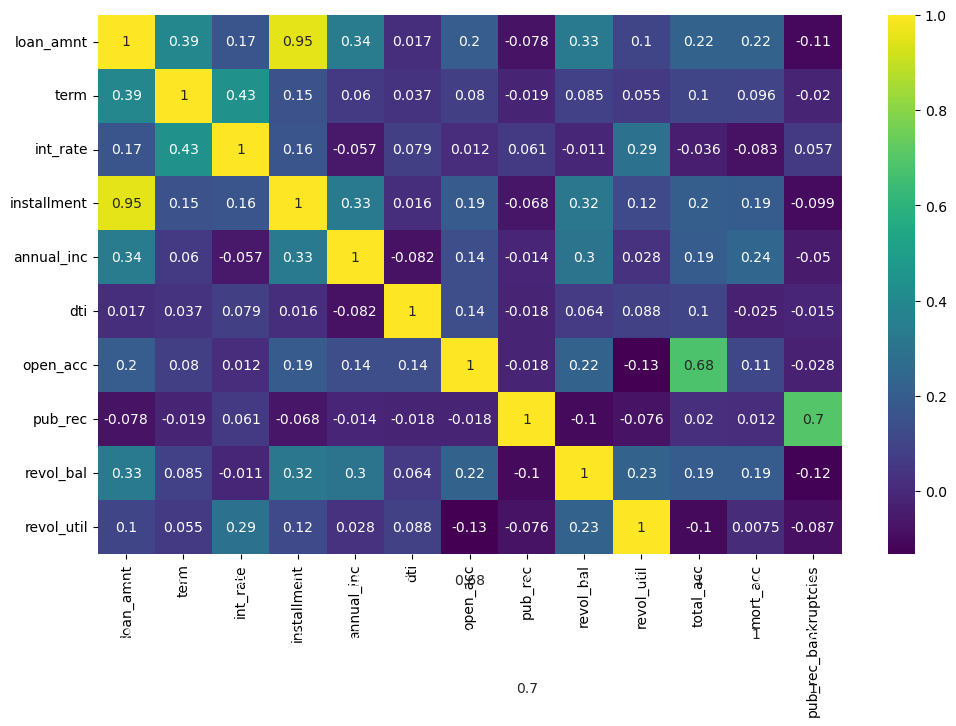

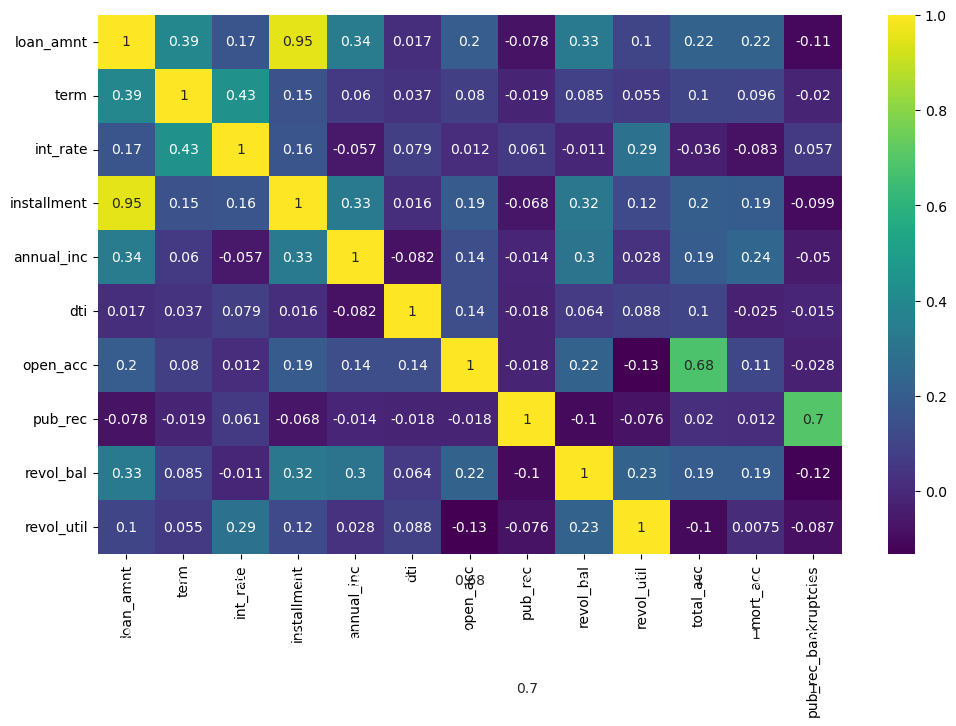

In [21]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only = True),annot=True,cmap='viridis')
plt.ylim(10, 0)
plt.show()

In [22]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [23]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


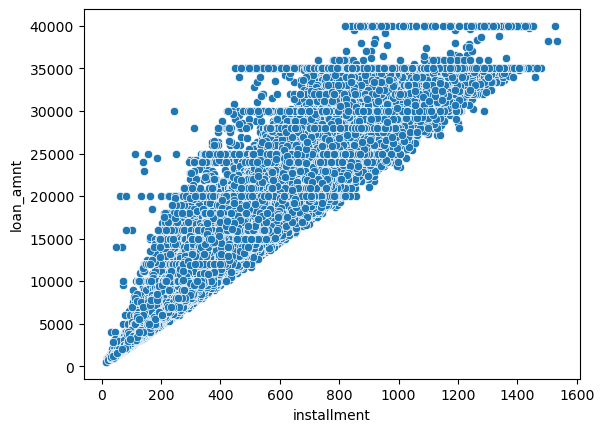

In [24]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)
plt.show()

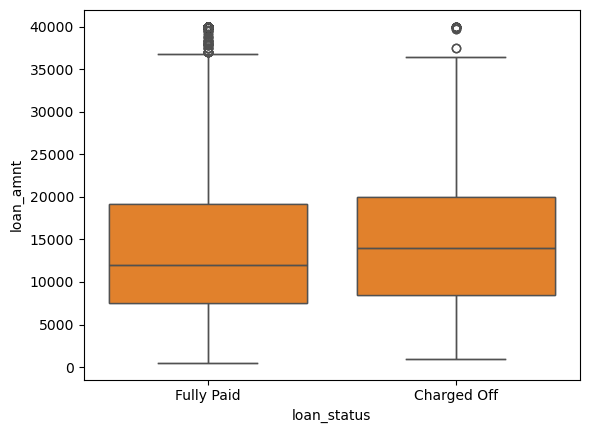

In [26]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
plt.show()

In [27]:
df.groupby('loan_status')['loan_amnt'].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19225.0  40000.0

In [28]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [29]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

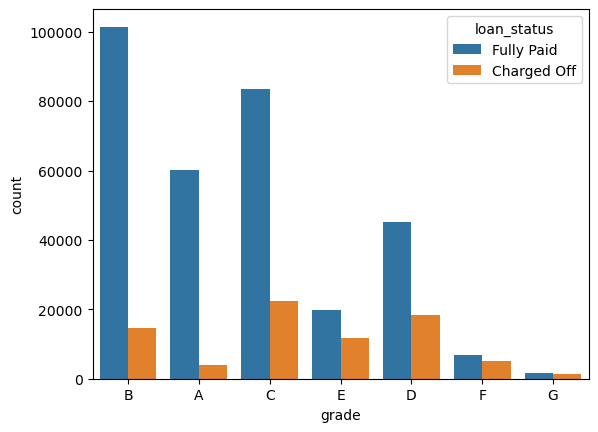

In [30]:
sns.countplot(x='grade',data=df,hue='loan_status')
plt.show()

C:\Users\ErnestMudau\AppData\Local\Temp\ipykernel_2648\2246208241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )


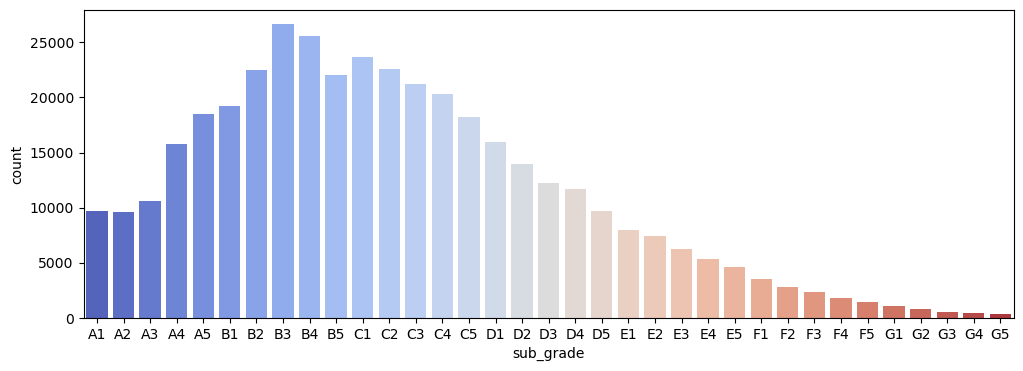

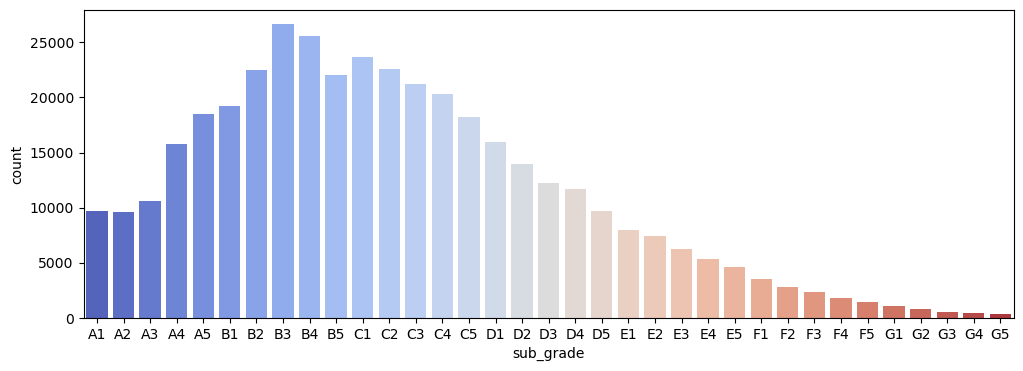

In [32]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )
plt.show()

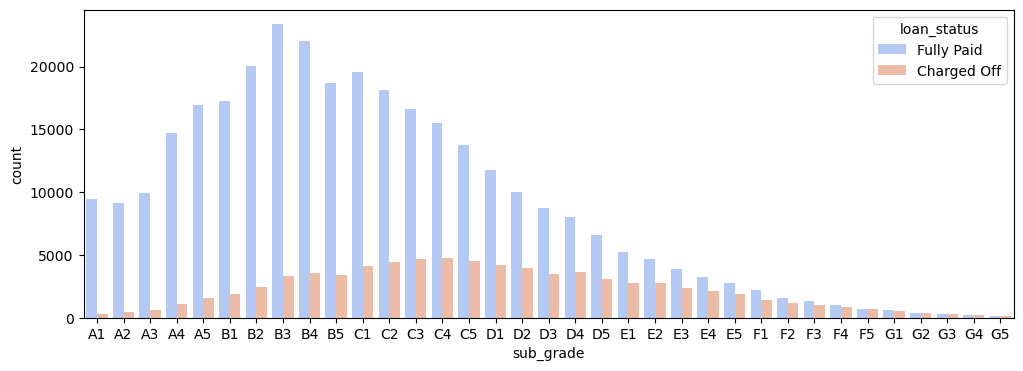

In [33]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')
plt.show()


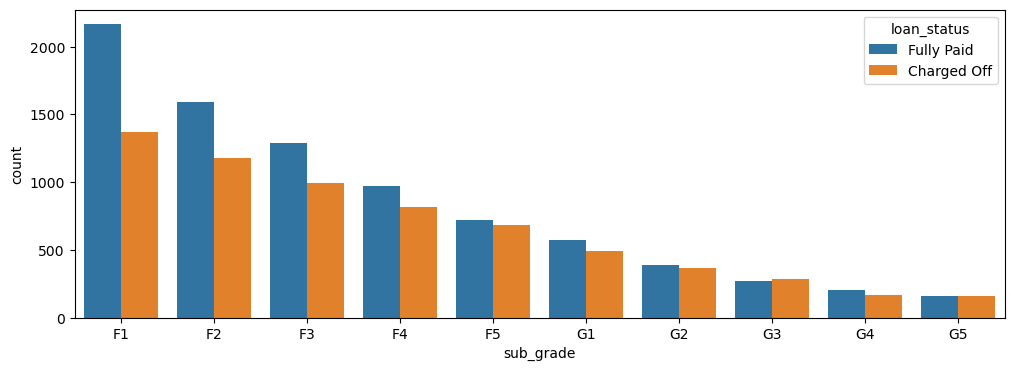

In [34]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')
plt.show()

In [35]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [36]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [37]:
df[['loan_repaid','loan_status']]

loan_repaid  loan_status
0                 1   Fully Paid
1                 1   Fully Paid
2                 1   Fully Paid
3                 1   Fully Paid
4                 0  Charged Off
...             ...          ...
396025            1   Fully Paid
396026            1   Fully Paid
396027            1   Fully Paid
396028            1   Fully Paid
396029            1   Fully Paid

[396030 rows x 2 columns]

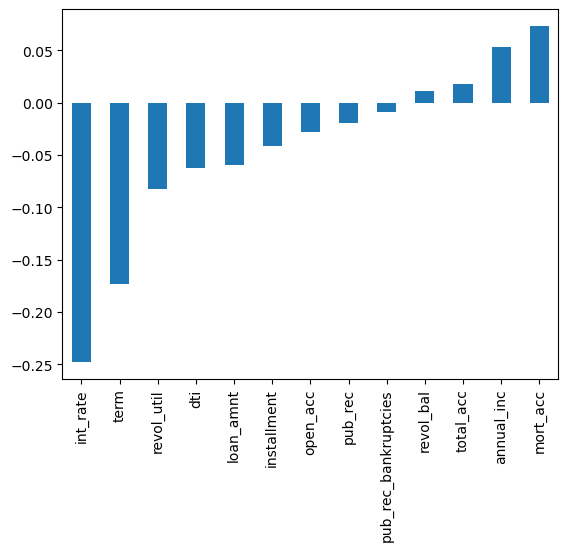

In [40]:
df.corr(numeric_only = True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')
plt.show()

In [41]:
df.head()

loan_amnt  term  int_rate  installment grade sub_grade  \
0    10000.0    36     11.44       329.48     B        B4   
1     8000.0    36     11.99       265.68     B        B5   
2    15600.0    36     10.49       506.97     B        B3   
3     7200.0    36      6.49       220.65     A        A2   
4    24375.0    60     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ... pub_rec  \
0                Marketing  10+ years           RENT    117000.0  ...     0.0   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...     0.0   
2             Statistician   < 1 year           RENT     43057.0  ...     0.0   
3          Client Advocate    6 years           RENT     54000.0  ...     0.0   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...     0.0   

  revol_bal revol_util total_acc initial_list_status  application_type  \
0   36369.0       41.8      25.0                   w        INDIVIDUAL   
1   20131.0       53.3      27.0                   f        INDIVIDUAL   
2   11987.0       92.2      26.0                   f        INDIVIDUAL   
3    5472.0       21.5      13.0                   f        INDIVIDUAL   
4   24584.0       69.8      43.0                   f        INDIVIDUAL   

  mort_acc  pub_rec_bankruptcies  \
0      0.0                   0.0   
1      3.0                   0.0   
2      0.0                   0.0   
3      0.0                   0.0   
4      1.0                   0.0   

                                           address  loan_repaid  
0     0174 Michelle Gateway\nMendozaberg, OK 22690            1  
1  1076 Carney Fort Apt. 347\nLoganmouth, SD 05113            1  
2  87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113            1  
3            823 Reid Ford\nDelacruzside, MA 00813            1  
4             679 Luna Roads\nGreggshire, VA 11650            0  

[5 rows x 28 columns]

In [42]:
len(df)

396030

In [43]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [44]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [45]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [46]:
df['emp_title'].nunique()

173105

In [47]:
df['emp_title'].value_counts()

emp_title
Teacher                         4389
Manager                         4250
Registered Nurse                1856
RN                              1846
Supervisor                      1830
                                ... 
Social Work/Care Manager           1
Regional Counsel                   1
Nor-Com Inc                        1
Director of the Bach Society       1
SPO II                             1
Name: count, Length: 173105, dtype: int64

In [48]:
df = df.drop('emp_title',axis=1)

In [49]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [50]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

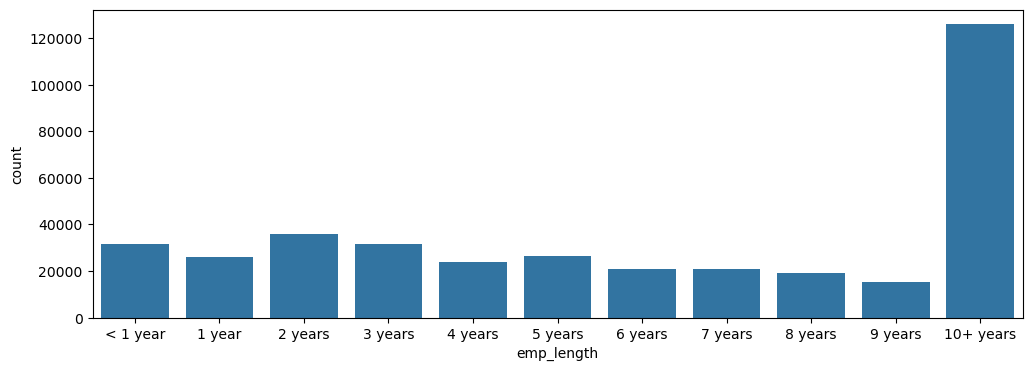

In [53]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)
plt.show()

In [54]:
plt.show()

In [55]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [56]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [57]:
emp_len = emp_co/emp_fp

In [58]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

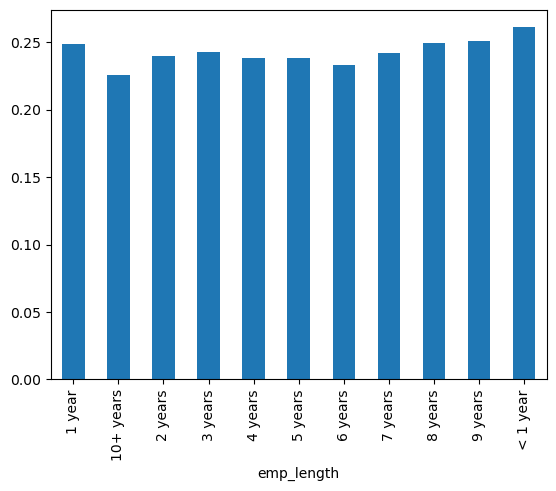

In [60]:
emp_len.plot(kind='bar')
plt.show()

In [61]:
df = df.drop('emp_length',axis=1)

In [62]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [63]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [64]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [65]:
df = df.drop('title',axis=1)

In [66]:
feat_info('mort_acc')

Number of mortgage accounts.


In [67]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
26.0         2
32.0         2
31.0         2
23.0         2
34.0         1
28.0         1
30.0         1
Name: count, dtype: int64

In [69]:
print("Correlation with the mort_acc column")
df.corr(numeric_only = True)['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
term                    0.096220
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [73]:
print("Mean of mort_acc column per total_acc")
print(df.groupby('total_acc')['mort_acc'].mean())


Mean of mort_acc column per total_acc
total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64


In [74]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()


In [75]:
total_acc_avg[2.0]

np.float64(0.0)

In [76]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [78]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [79]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [80]:
df = df.dropna()

In [81]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [82]:
df.select_dtypes(['object']).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [83]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

In [84]:
# Or just use .map()
df['term'] = df['term'].apply(lambda term: int(term[:3]))

TypeError: 'int' object is not subscriptable

In [85]:
df = df.drop('grade',axis=1)

In [86]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [87]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [88]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [89]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [90]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [91]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [93]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [94]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [95]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [96]:
df = df.drop('issue_d',axis=1)

In [97]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [98]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
df = df.drop('loan_status',axis=1)

In [101]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [102]:
print(len(df))

395219


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler = MinMaxScaler()

In [107]:
X_train = scaler.fit_transform(X_train)

In [108]:
X_test = scaler.transform(X_test)

In [109]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [110]:
model = Sequential()

In [111]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [112]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3032 - val_loss: 0.2657
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2649 - val_loss: 0.2630
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2628 - val_loss: 0.2626
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2619 - val_loss: 0.2623
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2611 - val_loss: 0.2620
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2603 - val_loss: 0.2617
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2600 - val_loss: 0.2616
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2597 - val_loss: 0.2618
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2596 - val_loss: 0.2616
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2592 - val_loss: 0.2614
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2587 - val_loss: 0.2616
Epoch 12/25
1236/1236 ━━━━━━━━

In [113]:
from tensorflow.keras.models import load_model

In [114]:
from tensorflow.keras.models import load_model

In [115]:
losses = pd.DataFrame(model.history.history)

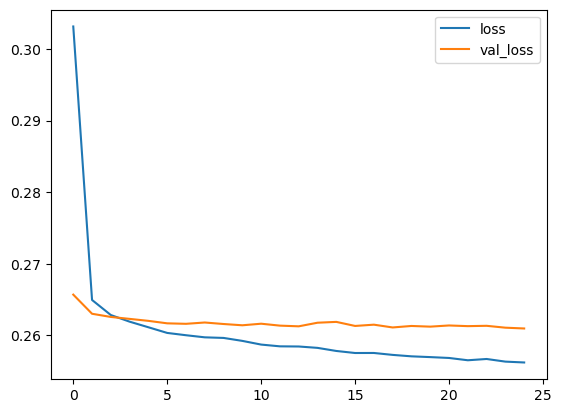

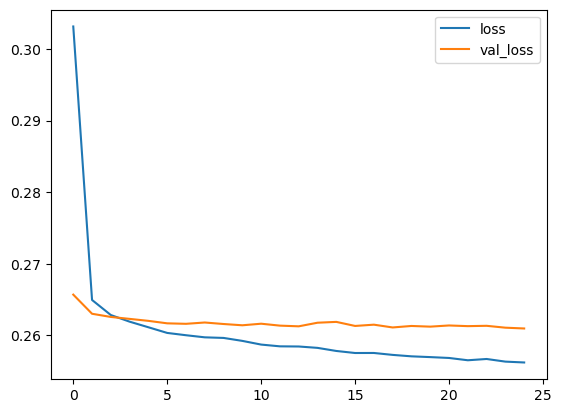

In [117]:
losses[['loss','val_loss']].plot()
plt.show()

In [118]:
from sklearn.metrics import classification_report,confusion_matrix

In [120]:
predictions = (model.predict(X_test) > 0.5).astype("int32")


2471/2471 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [121]:
import numpy as np

predictions = np.argmax(model.predict(X_test), axis=-1)


2471/2471 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [122]:
confusion_matrix(y_test,predictions)

array([[15658,     0],
       [63386,     0]])

In [123]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.0
term                     60
int_rate              18.24
installment          638.11
annual_inc          61665.0
                     ...   
48052                 False
70466                 False
86630                 False
93700                 False
earliest_cr_year       1996
Name: 305323, Length: 78, dtype: object

In [125]:
df.iloc[random_ind]['loan_repaid']

np.int64(1)